In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
pd.set_option('display.max_columns', None)

In [39]:
# Reading in the csv
wego = pd.read_csv("../data/wego.csv")

In [54]:
# Adding headway deviation percentage column
wego['HEADWAY_DEV_PERC'] = wego.HDWY_DEV/wego.SCHEDULED_HDWY*100
wego[['HDWY_DEV','HEADWAY_DEV_PERC']].head()

,HDWY_DEV,HEADWAY_DEV_PERC
7,2.666666,7.619046
8,1.966666,5.619046
9,-0.483334,-3.222227
11,-2.166667,-14.444447
12,-3.883334,-25.888893


In [ ]:
# Adding columns to indicate if headway was normal, bunching, or gapping

In [49]:
# adjusted_counts = wego[['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']].value_counts().reset_index()
# adjusted_counts

,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,count
0,0,0,1,208280
1,0,1,0,44800
2,1,0,0,8652


In [41]:
# Remove rows where all adjusted counts are 0 - they're mostly NaN values in all columns.
wego = wego.loc[~ ((wego['ADJUSTED_EARLY_COUNT'] == 0) &
             (wego['ADJUSTED_ONTIME_COUNT'] == 0) &
             (wego['ADJUSTED_LATE_COUNT'] == 0)) ]

In [42]:
wego.shape

(338861, 30)

In [43]:
# Remove rows where the previously scheduled stop was cancelled.
wego = wego[wego['PREV_SCHED_STOP_CANCELLED'] != 1.0]

In [45]:
wego.shape

(335191, 30)

In [47]:
wego.shape

(261732, 30)

In [30]:
# Removing adherence outliers 670
adherence = wego['ADHERENCE']

adherence_cleaned = adherence.dropna()

adherence_1 = np.percentile(adherence_cleaned, .1)
adherence_99 = np.percentile(adherence_cleaned, 99.9)

wego = wego[(wego['ADHERENCE'] >= adherence_1) & (wego['ADHERENCE'] <= adherence_99)]

# Print the results
print(adherence_1)
print(adherence_99)

-57.040499999999994
9.466666


In [31]:
wego.shape

(334521, 30)

In [34]:
# Testing R's code

# headwy =wego['HDWY_DEV'].dropna()
# headwydev_1= np.percentile(headwy,.1)
# headwydev_99=np.percentile(headwy,99.9)

# print(headwydev_1)
# print(headwydev_99)

-21.2
54.80226600000289


In [46]:
#Removing headway outliers 73,220
################# Too many! Problem solving this
headway = wego['HDWY_DEV']

headway_cleaned = headway.dropna()

headway_1 = np.percentile(headway_cleaned, .1)
headway_99 = np.percentile(headway_cleaned, 99.9)

wego = wego[(wego['HDWY_DEV'] >= headway_1) & (wego['HDWY_DEV'] <= headway_99)]

# Print the results
print(headway_1)
print(headway_99)

-21.624767162
56.43715000000084


In [11]:
wego['HDWY_DEV'].head()

7     2.666666
8     1.966666
9    -0.483334
11   -2.166667
12   -3.883334
Name: HDWY_DEV, dtype: float64

In [12]:
np.percentile(headway_cleaned, .1)

-21.2

In [13]:
# 334k
wego

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN
9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0
12,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 06:25:00,2023-08-01 06:23:30,2023-08-01 06:23:30,1.500000,15.0,11.116666,-3.883334,1,0,0,0,0.0,0,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350320,120230930,2,100406606,2023-09-30,7,702,2312,353447,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 21:45:00,2023-09-30 21:43:52,2023-09-30 21:50:54,-5.900000,30.0,36.716666,6.716666,0,0,1,0,0.0,0,7.033333,NaN
350323,120230930,2,100406609,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 22:16:00,2023-09-30 22:22:39,2023-09-30 22:24:37,-8.616666,30.0,34.916666,4.916666,0,1,0,0,0.0,0,1.966666,5.0
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 22:45:00,2023-09-30 22:49:19,2023-09-30 22:49:19,-4.316666,30.0,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN


# Q1
### What is the overall on-time performance, and what do the overall distributions of adherence and headway deviation look like?

In [14]:
# Percent of on-time stops
round((wego['ADJUSTED_ONTIME_COUNT'].sum()) / (wego.shape[0]) * 100, 2)

79.7

In [22]:
# Percent of early stops
round((wego['ADJUSTED_EARLY_COUNT'].sum()) / (wego.shape[0]) * 100, 2)

2.79

In [23]:
# Percent of late stops
round((wego['ADJUSTED_LATE_COUNT'].sum()) / (wego.shape[0]) * 100, 2)

16.85

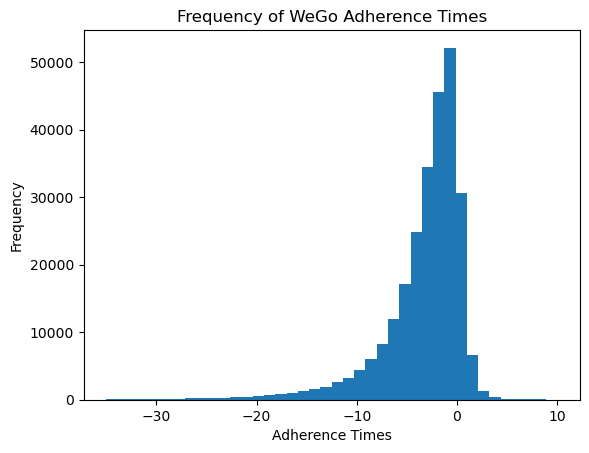

In [16]:
# Adherence distribution - removing non-visible outliers
plt.hist(wego.ADHERENCE, bins=40, range=(-35, 10))
plt.title('Frequency of WeGo Adherence Times')
plt.xlabel('Adherence Times')
plt.ylabel('Frequency')
plt.show() 

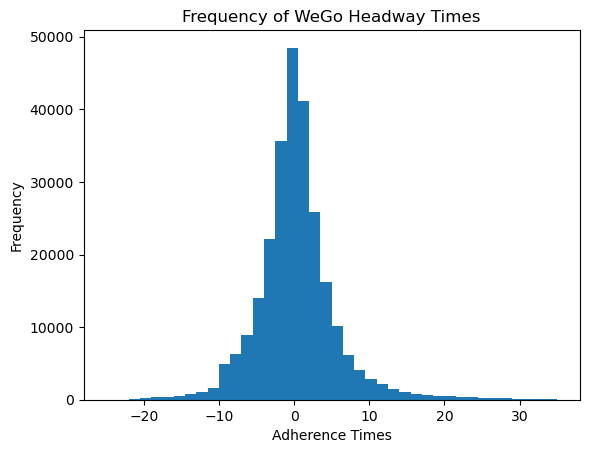

In [17]:
# Headway distribution - removing non-visible outliers
plt.hist(wego.HDWY_DEV, bins=40, range=(-25, 35))
plt.title('Frequency of WeGo Headway Times')
plt.xlabel('Adherence Times')
plt.ylabel('Frequency')
plt.show() 

# Q2
### How does direction of travel, route, or location affect the headway and on-time performance?

In [18]:
wego['ROUTE_DIRECTION_NAME'].value_counts()

ROUTE_DIRECTION_NAME
FROM DOWNTOWN    139170
TO DOWNTOWN      122131
Name: count, dtype: int64

In [19]:
to_downtown = wego[wego['ROUTE_DIRECTION_NAME']=='TO DOWNTOWN']
from_downtown = wego[wego['ROUTE_DIRECTION_NAME']=='FROM DOWNTOWN']